# BOXPLOTS

In [2]:
import pandas as pd
import numpy as np
import time 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import sys
sys.path.append('../..')
from data_import import*
from helper import*
from plot_params import*
from scipy.stats import zscore
from curlyBrace import curlyBrace
from paths import*

In [3]:
pp = PlotParams()
paths = paths()

In [4]:
f4_path = paths.f4_path + '/NOGTHSH/'

In [5]:
def corr_computation(data):
    corr_matrix = (data
                           .groupby(['model', 'participant', 'e_train', 'e_test', 'day'])
                           [['rt','rt_predicted']]
                           .corr())

    corr_matrix.reset_index(inplace = True)
    corr_matrix.drop(['level_5', 'rt'], axis = 1, inplace = True)
    matrix = corr_matrix.loc[corr_matrix['rt_predicted'] !=1]
    matrix['r_sqr'] = matrix.rt_predicted**2
    matrix.drop('rt_predicted', axis = 1, inplace = True)
    #data =  matrix.drop('day', axis = 1)
    #data = data.groupby(['model', 'participant', 'e_train', 'e_test']).sum()
    data = matrix.set_index(['model', 'participant', 'e_test'])
    return (data)

In [7]:
data = import_and_transform_data(f4_path, 'NOGTHSH_LEARNING_CURVES_d10_NOG_218_225_4chain_23_09_06.csv')
data_tag, data = data
#print(data_tag)

In [8]:
data_with_cutoff = corr_computation(drop_RTs_above_3std_below_180(data))
iHMM_data = data_with_cutoff.loc['iHMM', ['day', 'r_sqr']]
iHMM_data.reset_index(inplace=True)

# Crossover

# T-tests

In [9]:
iHMM_data = iHMM_data.pivot(index = ['participant', 'e_test'], columns = 'day', values = 'r_sqr')
iHMM_data.columns = ['d8_model', 'd9_model']
iHMM_data['diff'] = iHMM_data['d8_model'] - iHMM_data['d9_model']
iHMM_data.reset_index('e_test', inplace = True)

In [10]:
d9_blocks = ['227_230', '232_235', '237_240', '242_245']

In [11]:
iHMM_data.isnull().sum()

e_test      0
d8_model    0
d9_model    0
diff        0
dtype: int64

In [12]:
for i in range(0,3):
    
    set1 = iHMM_data.loc[iHMM_data['e_test'] == d9_blocks[i]]['diff']
    set2 = iHMM_data.loc[iHMM_data['e_test'] == d9_blocks[i+1]]['diff']
    
    t_test = sp.stats.ttest_rel(set1, set2)
    t_value, p_value = t_test
    print(f'Dependent t-test for blocks {d9_blocks[i]} and {d9_blocks[i+1]}. P-value: {p_value:.3f}{get_stars(p_value)}, t-value: {t_value:.3f}.')

Dependent t-test for blocks 227_230 and 232_235. P-value: 0.000***, t-value: 8.413.
Dependent t-test for blocks 232_235 and 237_240. P-value: 0.000***, t-value: -7.573.
Dependent t-test for blocks 237_240 and 242_245. P-value: 0.000***, t-value: 6.574.


In [13]:
for b in d9_blocks:
    subset = iHMM_data.loc[iHMM_data['e_test'] == b]['diff']
    t_test = sp.stats.ttest_1samp(subset, popmean=0)
    t_value, p_value = t_test
    print(f'One-sample t-test for {b}. H0: pop.mean = 0. P-value :' \
    f'{p_value:.3f}{get_stars(p_value)}, t-value: {t_value:.3f}.')


One-sample t-test for 227_230. H0: pop.mean = 0. P-value :0.290, t-value: 1.083.
One-sample t-test for 232_235. H0: pop.mean = 0. P-value :0.000***, t-value: -5.834.
One-sample t-test for 237_240. H0: pop.mean = 0. P-value :0.015*, t-value: 2.627.
One-sample t-test for 242_245. H0: pop.mean = 0. P-value :0.000***, t-value: -4.429.


In [14]:
labels = ['Task 1',
          'Task 2',
          'Task 1',
          'Task 2',
          'Task 1',
          'Task 2']

colors = ['royalblue', 'gold']*3

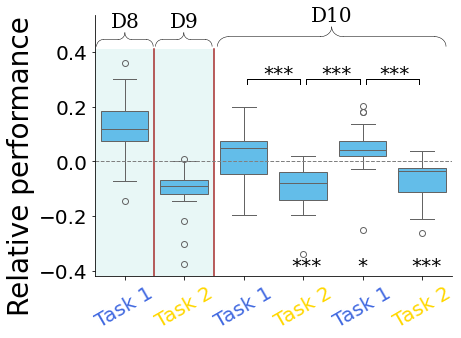

In [15]:
fig, axs = plt.subplots(1,1, sharex=False, sharey=True, figsize = pp.figsize) 
sns_plot = sns.boxplot(x="e_test", y="diff", data=iHMM_data, color = '#4dc4ff')
sns_plot.set_xlabel(None)
sns_plot.set_ylabel("Relative performance" , loc = ("top"), fontsize = pp.axlabsize)
sns_plot.set_xlim(-0.5, None)
                     
plt.yticks(fontsize = pp.ticklabsize)



#####################################
######## Axes
#####################################

sns_plot.spines["top"].set_visible(False)
sns_plot.spines["right"].set_visible(False)
#sns_plot.spines["left"].set_visible(False)


#####################################
######## Vertical lines & shading
#####################################

plt.axvline(1.5, ymax = 0.87, c = 'brown')
plt.axvline(0.5, ymax = 0.87, c = 'brown')
plt.axhline(0, c = 'grey', linestyle='--', linewidth = 1)
plt.axvspan(-0.5, 1.5, ymax = 0.87, facecolor='lightseagreen', alpha=0.1)


################################################################################
############################ Significance notations ############################
################################################################################

plt.axhline(y = .3, xmin = 0.425, xmax = 0.575, color = 'black', lw = 1)
plt.axhline(y = .3, xmin = 0.592, xmax = 0.742, color = 'black', lw = 1)
plt.axhline(y = .3, xmin = 0.759, xmax = 0.908, color = 'black', lw = 1)

ymax = 0.755

plt.axvline(x = 2.05, ymax = ymax, ymin = ymax -0.02, color = 'black', lw = 1)
plt.axvline(x = 2.95, ymax = ymax, ymin = ymax -0.02, color = 'black', lw = 1)
plt.axvline(x = 3.05, ymax = ymax, ymin = ymax -0.02, color = 'black', lw = 1)
plt.axvline(x = 3.95, ymax = ymax, ymin = ymax -0.02, color = 'black', lw = 1)
plt.axvline(x = 4.05, ymax = ymax, ymin = ymax -0.02, color = 'black', lw = 1)
plt.axvline(x = 4.95, ymax = ymax, ymin = ymax -0.02, color = 'black', lw = 1)


#####################################
######## Stars at the top ########
#####################################

plt.text(2.325, 0.3,'***', size = 20)
plt.text(3.308, 0.3,'***', size = 20)
plt.text(4.284, 0.3,'***', size = 20)

# fontdict for curly bracket 1 text
font = {'family': 'serif',
        'color':  'black',
#        'weight': 'bold',
        'style': 'normal',
        'size': pp.ticklabsize,
        }


y =0.42




########################
####### D10 Curly
########################
p1 = [1.56, y]
p2 = [2.0* 2.7, y]
k_r1 = 0.05

curlyBrace(fig, axs, p1, p2, k_r1, bool_auto=True, str_text='D10', 
           color = 'black', lw=0.5, int_line_num=1, fontdict=font)


########################
####### D8 Curly
########################
p1 = [-0.47, y]
p2 = [2.0* 0.24, y]
k_r1 = 0.12
curlyBrace(fig, axs, p1, p2, k_r1, bool_auto=True, str_text='D8', 
           color = 'black', lw=0.5, int_line_num=1, fontdict=font)


p1 = [0.52, y]
p2 = [2.0* 0.735, y]
k_r1 = 0.12


curlyBrace(fig, axs, p1, p2, k_r1, bool_auto=True, str_text='D9', 
           color = 'black', lw=0.5, int_line_num=1, fontdict=font)


##############################################
############ Stars at the bottom ############
##############################################

plt.text(1.81, -0.4,'', size = 20)
plt.text(2.81, -0.4,'***', size = 20)
plt.text(3.91, -0.4,'*', size = 20)
plt.text(4.81, -0.4,'***', size = 20)



sns_plot.set_xticks(np.arange(len(labels)))
sns_plot.set_xticklabels(labels, fontsize = pp.ticklabsize, rotation=30);
for xtick, color in zip(sns_plot.get_xticklabels(), colors):
    xtick.set_color(color)


In [16]:
fig.savefig(paths.plot_save_path +'/manuscript_plots_standard/' +'fliplflop.pdf', bbox_inches='tight')
fig.savefig(paths.plot_save_path +'/manuscript_plots_standard/' +'fliplflop.png', bbox_inches='tight')